<a href="https://colab.research.google.com/github/valerymamontov/colab_notebooks/blob/main/Correlation_diagrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Визуализация совместных распределений. Корреляционные диаграммы.  
  
Используются открытые данные по результатам сдачи ЕГЭ в школах Москвы в период 2016-2017 год.  
Для анализа из набора взяты только числовые данные:
 - PASSES_OVER_220 (число отличников - результат более 220 баллов)
 - PASSES_UNDER_160 (число хорошистов - результат до 160 баллов)  

Данные сгруппированы по округам Москвы.  
Цель - понять связаны ли две серии данных. Визуализировать совместное распределение.  
Корреляция (корреляционные диаграммы) позволит узнать насколько обосновано применение линейной регрессии и посмотреть на характер распределений.

In [1]:
import pandas as pd

data = pd.read_csv("https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv", delimiter=";")
data.head()

,ID,EDU_NAME,global_id,YEAR,AdmArea,District,PASSES_OVER_220,PASSER_UNDER_160,Unnamed: 8
0,8236,Государственное бюджетное общеобразовательное ...,797946035,2016-2017,Восточный административный округ,район Богородское,5,19,NaN
1,8237,Государственное казенное общеобразовательное у...,797949150,2016-2017,Восточный административный округ,район Богородское,14,47,NaN
2,8238,Государственное казенное общеобразовательное у...,797949275,2016-2017,Восточный административный округ,район Вешняки,0,1,NaN
3,8239,Частное учреждение общеобразовательная организ...,797949425,2016-2017,Восточный административный округ,район Вешняки,0,6,NaN
4,8240,Автономная некоммерческая организация средняя ...,797949570,2016-2017,Восточный административный округ,район Восточное Измайлово,1,5,NaN


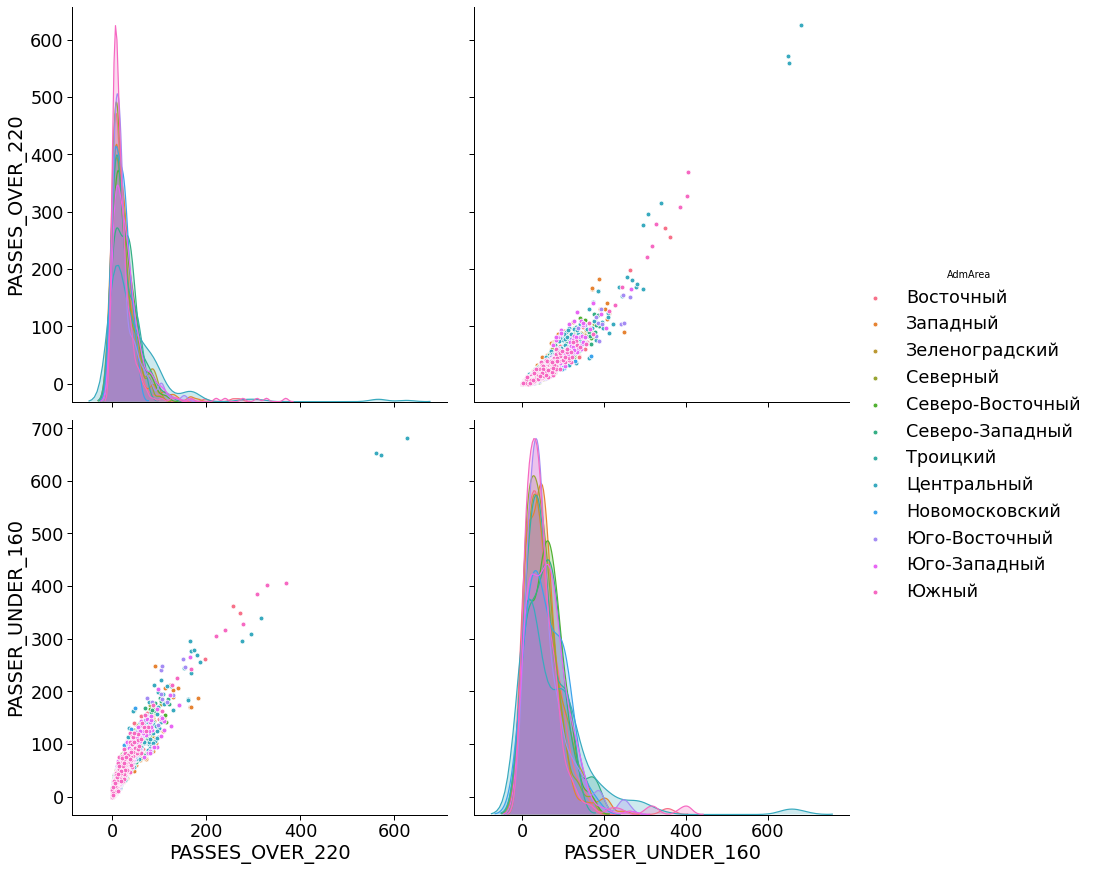

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set_context("paper", font_scale=2)
data["AdmArea"] = data["AdmArea"].apply(lambda x: x.split(" ")[0])
data1 = pd.DataFrame(data, columns=["PASSES_OVER_220", "PASSER_UNDER_160", "AdmArea"])
sns.pairplot(data1, hue="AdmArea", height=6)
plt.show()

Графики показывают, что в округах (школах) с большим числом отличников много и хорошистов. То есть налицо корреляция.  
  
Применив функцию stats.pearsonr из библиотеки Scipy, производится расчёт "Pearson correlation coefficient" (коэффициента кореляцииПирсона).  
  
  

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


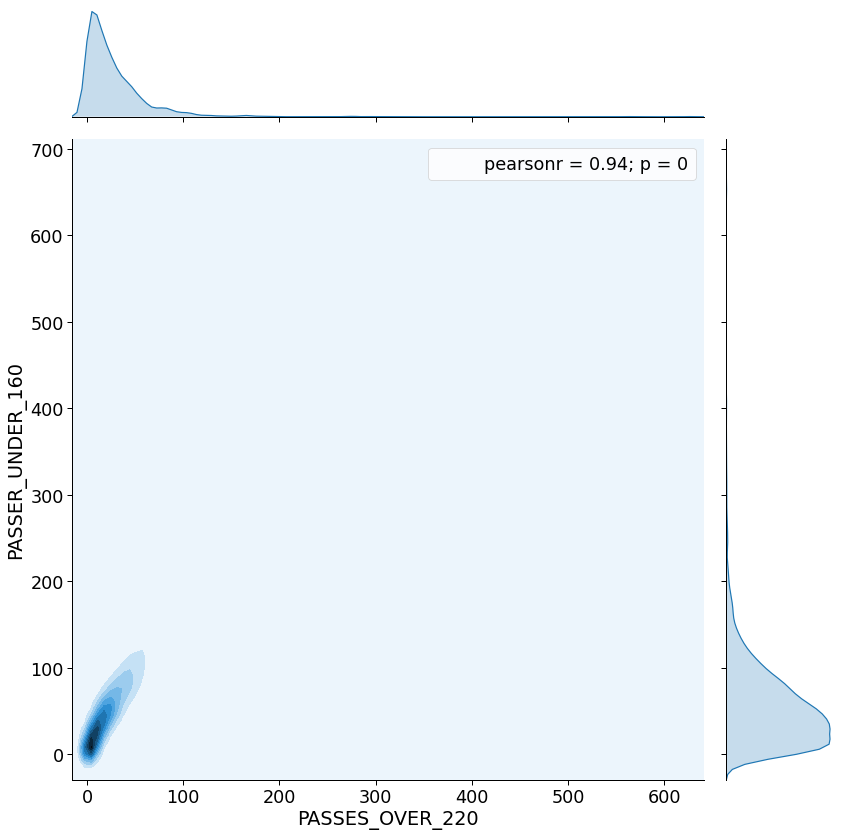

0.94


In [ ]:
sns.jointplot("PASSES_OVER_220", "PASSER_UNDER_160", data, height=12, kind="kde").annotate(stats.pearsonr)
plt.show()
print(round(stats.pearsonr(data["PASSES_OVER_220"], data["PASSER_UNDER_160"])[0], 2))

Итог: коэффициент корреляции = 0.94.  
Такое высокое значение коэффициента корреляции ещё раз подтверждает связь между сериями данных и значит, что можно применить линейную регрессию для предсказания в одну или другую сторону.